In this notebook I show how I generate some of the illustrations for Weeks 8 and 9 of my Geometric Measure Theory class. Like with the other notebooks for this class, the idea is to define classes that represent different geometric objects that are common to work with (cubes, balls, lines, cones, etc) in such a way that one can generate figures by writing readable code. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
from gmt.objects import Ball, Cube, Interval, Segment, Line, Cone, Rotation
from gmt.covering_lemmas import FiveR
from gmt.plot import new_plot, plot_projections_of_segments, plot_projections_of_balls, plot_projections_of_cubes

# Projections

I introduce some plotting functions to show the "shadow" of an object (i.e. ball, segment, or cube) when projected into some line.

We give a quick example of how this looks in practice.

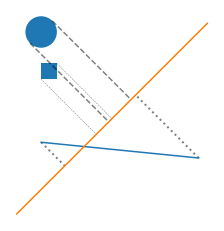

In [4]:

#This creates an axes object with axes set to "off" and sets the aspect to "equal".
#It does have the option of setting xlim and ylim and passing arguments to plt.subplots()

ax = new_plot()


#Line through the origin parallel to the vector [1,1]

line = Line([1,1])

#Ball centered at [-5,5] of radius 1

ball = Ball([-5,5],1)

#Cube equal to [-5,-4] x [2,3]

cube = Cube([[-5,-4],[2,3]])

#Line segment from [-5,2] to [5,-3]

segment = Segment([[-5,-2],[5,-3]])

#These commands plot lists of balls, cubes, 
#or segments along with the trajectory of their 
#projections into a line

plot_projections_of_balls([ball], line, ax, linestyle = "dashed", color= "k", alpha=.5)

plot_projections_of_cubes([cube], line, ax, linestyle = "dashed", color= "k", alpha=.5, linewidth=.5)

plot_projections_of_segments([segment], line, ax, linestyle = "dotted", color= "k", alpha=.5, linewidth=2)



cube.plot(ax)
ball.plot(ax)
segment.plot(ax)
line.plot(ax)


As an application, we create an image demonstrating that the projection of the Garnett Example (i.e. the 4-corner Cantor set) in some direction is equal to an interval. 

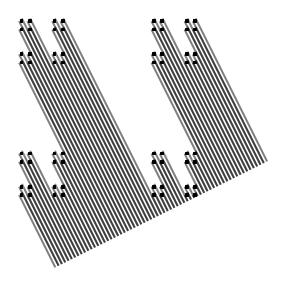

In [5]:

#The following recusive function returns the n-th level approximation to the cantor set.
#We are only really concerned with doing this for the unit cube, but writing it for a
#general cube allows us to use recursion.

def cantor(n, cube = Cube()):
    #returns cube contracted by a factor 1/4 toward the origin. 
    R = cube.contract(.25)
    contractions = lambda Q: [R, R + np.array([0,3/4]), R+ np.array([3/4,3/4]), R+ np.array([3/4,0])]
    if n==0:
        return [cube]
    elif n==1:
        return contractions(cube)
    else:
        return [R  for Q in contractions(cube) for R in cantor(n-1,Q)]




ax = new_plot(figsize = (5,5))

#This is the line we will project the cantor set into
line = Line(np.array([-.25,.5]), np.array([0,-.5]), normal=True)

#We get the 3rd level approximation of the cantor set, which will be a list of 
#4^3 cube objects. 

cubes = cantor(3)

#Now we just plot each of the cubes...
for Q in cubes:
    Q.plot(ax=ax, color = "black")

#And then plot the trajectories of their projections
plot_projections_of_cubes(cubes,line,ax, color="black", alpha=.5, linewidth=2)



The new_plot function has the option of supplying several axes objects. This is different from using plt.subplots(n,m) that would generate one image consisting of a grid of nxm figures. Instead, new_plot(n) creates n separate images that can be downloaded separately (this is ideal for slides, where as you flick between slides you want to show the same figure but with small adjustments to it on each slide).

Below are some examples of figures made to illustrate Marstrand's Theorem. The first set I show how to make multiple plots with new_plot, and in the second I just pack them into a usual plt.subplots() grid to save on space. The images may not make sense, but you can visit my Geometric Measure Theory YouTube channel and see the video "Marstrand's Rectifiability Criterion" for the context. 

More the point for showing this here is as a proof of concept that one can write readable code to illustrate these concepts. 

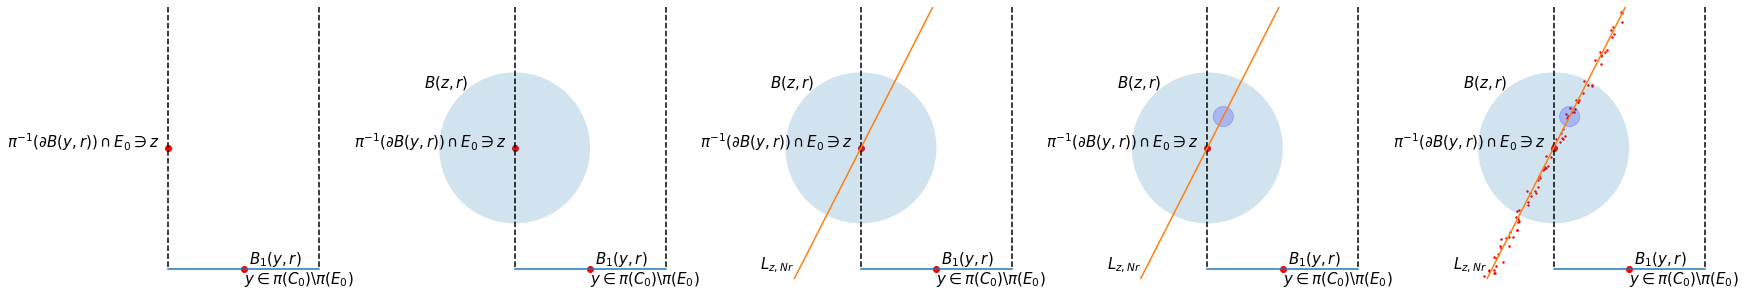

In [6]:

#axes = new_plot(5,xlim = [-.6,1.6], ylim = [-.1,2.6], figsize = (5,5))

fig, axes = plt.subplots(1,5, figsize = (30,5))
for ax in axes:
    ax.set_xlim([-.6,2.1])
    ax.set_ylim([-.1,2.6])
    ax.axis("off")
    ax.set_aspect("equal")
fontdict={"size":15}


#Slide 1

for ax in axes:
    z = np.array([.5,1.2])
    ax.scatter(*z,color="red")

    Byr = Segment([[.5,0],[2,0]])

    Byr.plot(ax)

    ax.scatter(*Byr.m, c="red")

    plot_projections_of_segments([Byr + np.array([0,3])],Line([1,0]),ax, linestyle = "--", color="black")


    ax.text(Byr.m[0],-.15,r'$y\in \pi(C_0)\backslash \pi(E_0)$',fontdict=fontdict)

    ax.text(-1.1,1.2,r"$\pi^{-1}(\partial B(y,r))\cap E_0 \ni z$",fontdict=fontdict)

    ax.text(1.3,.05,r"$B_{1}(y,r)$",fontdict=fontdict)


#Slide 2

for ax in axes[1:]:

    Bzr = Ball(z,.75)

    Bzr.plot(ax, alpha=.2)

    ax.text(-.4,1.8,r"$B(z,r)$",fontdict=fontdict)



#Slide 3

for ax in axes[2:]:
    theta = .7*np.pi/2
    
    Lzr = Line(theta,z)

    Lzr.plot(ax)

    ax.text(-.5,0,r"$L_{z,Nr}$",fontdict=fontdict)



#Slide 4

for ax in axes[3:]:
    w = z + .35 * np.array([np.cos(theta),np.sin(theta)])
    
    Bwr = Ball(w, .1)

    Bwr.plot(ax, color = "blue", alpha = .2)


#Slide 5
for ax in axes[4:]:
    Z = np.random.multivariate_normal(z, np.array([[1,0],[0,.001]]), size=100)

    pi_over_4 = Rotation(theta)
    Z = pi_over_4(Z-z)+z
    ax.scatter(Z[:,0],Z[:,1], s=2, color="Red")

    
    
    
    







In the next figure (again for proving Marstrand's Theorem) the code is a bit awful to look at, but the reason is that I wanted to add some randomness to the figure. Again, see the Marstrand video mentioned earlier for context.

In [7]:

centers = np.random.rand(100,2) @ np.array([[1,0],[0,.1]]) + np.array([0,.5])

z = np.array([1/2,1/2])

#centers = np.random.multivariate_normal(z, np.array([[1,0],[0,.001]]), size=100)

centers = np.random.rand(100,2) @ np.array([[1,0],[0,.1]]) + np.array([0,.5])

balls = [Ball(x,.05) for x in centers]

R_1 = Line([1,0])

projected_balls = R_1.project_balls(balls)

converted_to_1_dimensional_balls = [Ball([s.m[0]],s.len/2) for s in projected_balls]

projection_to_ball = {b:B for b,B in zip(converted_to_1_dimensional_balls,balls)}

subcollection_of_projected_balls = FiveR(converted_to_1_dimensional_balls)

L = len(subcollection_of_projected_balls)

theta = (np.random.rand(L)-.5)*.1  + np.pi/2

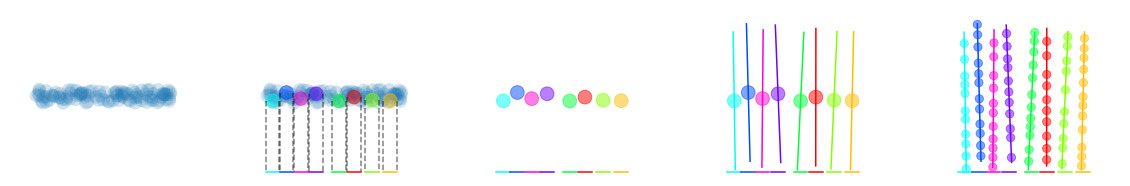

In [8]:

fig, axes = plt.subplots(1,5, figsize = (20,4))

colors = ["red","green","purple","orange","brown","blue","cyan"]
cmap=plt.get_cmap("hsv")

for ax in axes[:2]:
    for B in balls:
        B.plot(ax, alpha=.2)

subballs = [projection_to_ball[b] for b in subcollection_of_projected_balls]

plot_projections_of_balls(subballs, R_1, ax=axes[1], linestyle="--", color="black", alpha=.5)

for j,b in enumerate(subcollection_of_projected_balls):

    
    c=cmap(j/L)
    B = projection_to_ball[b]
    [B.plot(ax, alpha=.5, color=c) for ax in axes[1:4]]

    b = b + np.array([0,0])
    i = Segment([b.x-np.array([b.r,0]),b.x+np.array([b.r,0])])
    
    [i.plot(ax, color=c) for ax in axes[1:]]

    v = .5*np.array([np.cos(theta[j]), np.sin(theta[j])])
    
    segment  = Segment([B.x+v,B.x-v])
    
    [segment.plot(ax, c=c) for ax in axes[3:]]
    
    segment_cover = [Ball(2*(np.random.rand()-.5)*v + B.x,.03) for _ in range(50)]
    
    segment_subcover = FiveR(segment_cover)
    
    for b in segment_subcover:
        b.plot(axes[4], color=c, alpha=.5)


for ax in axes:
    ax.set_xlim([-.2,1.2])
    ax.set_ylim([-.05,1.2])
    ax.set_aspect("equal")
    ax.axis("off")

# Cones

I also added a new cone object, which are crucial for illustrating some concepts about rectifiable sets. 

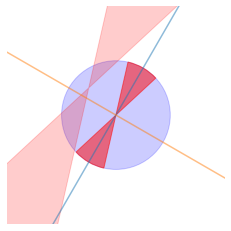

In [9]:
#Line through origin of angle pi/3

line = Line(np.pi/3)

#The unit ball

B = Ball()

#Below we define a two-sided cone at the origin parallel to the 
#line above of radius 1 and aperture equal to .3

aperture=.3

cone = Cone(0,np.pi/3,aperture,1, two_sided=True)

#We start a new plot with some set x and y limits

ax = new_plot(xlim=[-2,2], ylim=[-2,2])

#Now we plot each object
B.plot(ax, alpha=.2, color="b")

cone.plot(ax, alpha=.5, color="r")

#We can even update the cone's radius, translate it by a vector,
#and plot it again.
#Here we plot the cone again but with triple the radius
#and with more opacity.
cone.r = 3

#We translate one unit to the right
t = np.array([-.5,.5])
(cone+t).plot(ax, alpha=.2, color="r")

line.plot(ax, alpha=.5)

#The line object also has a method that returns the line
#perpendicular to it.
line.perp().plot(ax, alpha=.5)


# Random Curves

A lot of this code was developed for studying rectifiable sets, which I like to visualize as very rough curves. Below is a function that returns a random curve by doing the von Koch construction with respect to a given segment. I didn't spend too much time thinking about this or trying to perfect it, and it's likely to be replaced in the future. 


Given a segment, it replaces its middle third with two new segments of equal length of a specified relative height forming a tent over or under (randomly) the original segment. It then repeats this process on each subsegment, then on the subsegments of those subsegments, and so on for a total of n levels. If fixed_height is set to False, then it also picks the height of these tents uniformly at random between 0 and height.

Using the von Koch construction ensures that, so long as the height factor is not too high, the construction will return a non-intersecting curve. In fact, it will be a quasicurve, and hence can be used for illustrating things like NTA or uniform domains. 

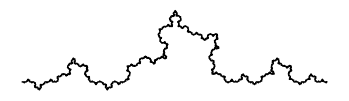

In [10]:

from gmt.objects import random_curve

X = random_curve(Segment([[0,0],[1,0]]),.7,6)

ax = new_plot()
ax.plot(X[:,0],X[:,1], c="k")





For a set E, a cone point is a point x where there is a two-sided cone of some radius centered at this point that does not intersect E except at x. Below I use the above curve and show an example of a cone point by first defining a cone based at zero and then translating it to some point along my curve (after some trial and error in finding a point that is in fact a cone point)

/Users/jazzam/Google Drive/Colab Notebooks/Math/gmt/objects.py:838: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(Wedge(tuple(self.x), self.r, theta-aperture,theta+aperture, **kwargs))
/Users/jazzam/Google Drive/Colab Notebooks/Math/gmt/objects.py:844: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(Wedge(tuple(self.x), self.r, theta+180-aperture,theta+180+aperture, **kwargs))


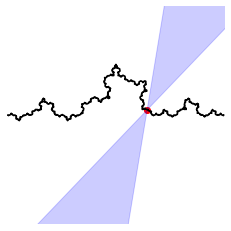

In [12]:
cone = Cone([0,0],[1,2],.3,2,two_sided=True)

ax = new_plot(xlim=[0,1],ylim=[-.5,.5])

ax.plot(X[:,0],X[:,1], color="k")

for i in [750]:
    (cone+X[i]).plot(ax, color="blue", alpha=.2,edgecolor= "k")
    ax.scatter(*X[i], color="r")


# ax.set_xlim([.3,1])
# ax.set_ylim([-.2,.3])



Below I generate a random curve and create a horribly inneficient loop to find all cone points and plot the two-sided cone corresponding to each point. As you see, each two-sided cone only hits the curve at its apex.

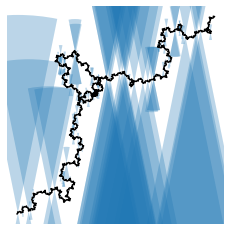

In [13]:
X = random_curve(Segment([[0,0],[1,1]]),.9,6)

ax = new_plot()
ax.plot(X[:,0],X[:,1], c="k")

r = {tuple(x):1 for x in X}

aperture = .2
for x in X:
    for y in X:
        if  abs(x[0]-y[0])<aperture * np.linalg.norm(x-y):
            r[tuple(x)]=min(r[tuple(x)],np.linalg.norm(x-y))




choice = np.random.choice(len(X),150)


for x in X[choice]:
    Cone(x,[0,1],aperture,r[tuple(x)],two_sided=True).plot(ax, alpha=.3)


